In [1]:
import pandas as pd
from cl_cpmm import ConcentratedLiquidity
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
direct = '/Volumes/luke-uni/data/uniswap-v3/NFT_manager'
dfs = []
for file in os.listdir(direct):
    tdf = pd.read_parquet(f'{direct}/{file}')
    dfs.append(tdf)
nft = pd.concat(dfs)


In [3]:
nft.rename({'args.tokenId':'tokenId', 'args.liquidity':'liquidity'}, axis=1, inplace=True)

In [4]:
nft

,event,logIndex,transactionIndex,transactionHash,address,blockHash,blockNumber,tokenId,liquidity,args.amount0,args.amount1,args.recipient,args.from,args.to,args.owner,args.approved,args.operator
0,DecreaseLiquidity,218,161,0xfdf8fb54828dc8a28bc0623f71f213118683a5ef02fd329b5d868ae0395e2577,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0x26ff7321f0c5642b73c35dbd334c93a98585b2f7cc7122dcf89f693d4503f85c,13000001,108859.0,3.861221e+20,6.497390e+21,1.967607e+18,nan,nan,nan,nan,nan,nan
1,Collect,222,161,0xfdf8fb54828dc8a28bc0623f71f213118683a5ef02fd329b5d868ae0395e2577,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0x26ff7321f0c5642b73c35dbd334c93a98585b2f7cc7122dcf89f693d4503f85c,13000001,108859.0,NaN,6.497390e+21,1.967607e+18,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,nan,nan,nan,nan,nan
2,Transfer,438,288,0x61ae78f150a50d2f145779200bee946c5a36c54c04fe1dbba504815607ce0096,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xb21a33c3fb4904f52f7391734bbc9dd12678223c9377f38ef39f1760dad8b6c2,13000011,108867.0,NaN,NaN,NaN,nan,0x0000000000000000000000000000000000000000,0x1bB1EDfbF2D183Dbaf32557C63b6454daEc2A0e2,nan,nan,nan
3,IncreaseLiquidity,439,288,0x61ae78f150a50d2f145779200bee946c5a36c54c04fe1dbba504815607ce0096,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xb21a33c3fb4904f52f7391734bbc9dd12678223c9377f38ef39f1760dad8b6c2,13000011,108867.0,4.740894e+21,1.766912e+22,9.869782e+18,nan,nan,nan,nan,nan,nan
4,DecreaseLiquidity,194,109,0x6ebed710fd89ddf67df094fa55c67574f02f2068aa33611d5748c18e727394c4,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0x29e05b6a260eab7b5eb7b1ded4db944cecb6d41217a0722946400d2cdb57265c,13000015,108202.0,1.586446e+21,1.087168e+22,4.955736e+18,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469584,DecreaseLiquidity,75,76,0xdc27e19a57fef980b6b6e3266c66010d65754271709316164bbd26dfafd3da88,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xac0225e6e9657855edde02b1f6acff0d4a25ef8428c3e00af77616e632be8811,12999997,108659.0,2.745068e+16,6.094059e+16,9.608252e+14,nan,nan,nan,nan,nan,nan
469585,Collect,80,76,0xdc27e19a57fef980b6b6e3266c66010d65754271709316164bbd26dfafd3da88,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xac0225e6e9657855edde02b1f6acff0d4a25ef8428c3e00af77616e632be8811,12999997,108659.0,NaN,6.129241e+16,9.660503e+14,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,nan,nan,nan,nan,nan
469586,DecreaseLiquidity,331,209,0x6aa8a423c336ba58fa770a72d9629ab4cf8d82856e0b5329713a9ef24d487c17,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xa7494c5e38ffb0bcd279caf1ccbcad3aea47a3cf03213fd1364fbafdca706973,12999999,13665.0,6.409322e+21,1.756688e+22,0.000000e+00,nan,nan,nan,nan,nan,nan
469587,Collect,335,209,0x6aa8a423c336ba58fa770a72d9629ab4cf8d82856e0b5329713a9ef24d487c17,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0xa7494c5e38ffb0bcd279caf1ccbcad3aea47a3cf03213fd1364fbafdca706973,12999999,13665.0,NaN,1.766912e+22,8.488901e+17,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,nan,nan,nan,nan,nan


In [5]:
nft['event'] = nft['event'].mask(nft['event'] == 'IncreaseLiquidity', 'Mint')
nft['event'] = nft['event'].mask(nft['event'] == 'DecreaseLiquidity', 'Burn')

In [6]:
pools = pd.read_csv('./pools/top250.csv', index_col=[0])

In [7]:
pools.loc[pools['volumeUSD'].isin(pools['volumeUSD'].nlargest(30))]

,index,pool_id,pool_name,volumeUSD
0,4550,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,USDC/ETH 0.05%,3.648782e+11
1,4623,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,USDC/ETH 0.3%,6.662734e+10
2,582,0x11b815efb8f581194ae79006d24e0d814b7697f6,ETH/USDT 0.05%,6.221851e+10
3,1702,0x3416cf6c708da44db2624d63ea0aaef7113527c6,USDC/USDT 0.01%,5.193312e+10
4,2277,0x4585fe77225b41b697c938b018e2ac67ac5a20c0,BTC/ETH 0.05%,4.818941e+10
5,2550,0x4e68ccd3e89f51c3074ca5072bbac773960dfa36,ETH/USDT 0.3%,2.947754e+10
6,3200,0x60594a405d53811d3bc4766596efd80fd545a270,DAI/ETH 0.05%,2.347231e+10
7,6776,0xcbcdf9626bc03e24f779434178a73a0b4bad62ed,BTC/ETH 0.3%,2.136289e+10
8,3989,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC/USDT 0.05%,1.377580e+10
9,2852,0x5777d92f208679db4b9778590fa3cab3ac9e2168,DAI/USDC 0.01%,1.348986e+10


In [26]:
ADDRESS = '0xc63b0708e2f7e69cb8a1df0e1389a98c35a76d52' #'0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8' #'0x0a55882f4e1117adc54afbbac4a39079ad52fb89' #'0x68082ecc5bbad8fe77c2cb9d0e3403d9a00ccbc2'

In [27]:
meta_pool_data = pools.loc[pools['pool_id'] == ADDRESS]

In [28]:
pool_name = meta_pool_data.pool_name.values[0] 

In [29]:
fee = pool_name.split(' ')[-1]

In [30]:
if fee == '1.0%':
    FEE = 10000
    TICK_SPACING = 200

elif fee == '0.3%':
    FEE = 3000
    TICK_SPACING = 60

elif fee == '0.05%':
    FEE = 500
    TICK_SPACING = 10

elif fee == '0.01%':
    FEE = 100
    TICK_SPACING = 1

In [31]:
nft_address = '0xC36442b4a4522E871399CD717aBDD847Ab11FE88'

In [32]:
direct = f'/Volumes/luke-uni/data/uniswap-v3/raw/{ADDRESS}'
dfs = []
for file in os.listdir(direct):
    tdf = pd.read_parquet(f'{direct}/{file}')
    dfs.append(tdf)
df = pd.concat(dfs)
df.drop_duplicates(inplace=True)
df.sort_values(by = ['blockNumber', 'logIndex'], inplace=True)
df

,event,logIndex,transactionIndex,transactionHash,address,blockHash,blockNumber,args.sqrtPriceX96,args.tick,args.owner,args.tickLower,args.tickUpper,args.sender,args.amount,args.amount0,args.amount1,args.recipient,args.liquidity,args.observationCardinalityNextOld,args.observationCardinalityNextNew,args.paid0,args.paid1
0,Initialize,98,64,0x72564d006c38b5316580c25a793b9da640c67e0128e3483dafe08b6dc6e76e21,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0xc4cb2a0c82f16c3570595f49dd96118cba29507106ea5de7ad55b85b0357446a,12379502,7.922431e+22,-276325.0,nan,NaN,NaN,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN
1,Mint,102,64,0x72564d006c38b5316580c25a793b9da640c67e0128e3483dafe08b6dc6e76e21,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0xc4cb2a0c82f16c3570595f49dd96118cba29507106ea5de7ad55b85b0357446a,12379502,NaN,NaN,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,-277000.0,-275490.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,4.891116e+15,2.000000e+20,1.623047e+08,nan,NaN,NaN,NaN,NaN,NaN
2,Mint,357,234,0xf7f0735e80c982c1948d6cde0d18fdd77b4d6fa2f028acdadda3094557d2e313,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0x787a94e1ebfec70fb61268af9b3529731b17a853935aef485c3a76bb183745df,12379637,NaN,NaN,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,-276420.0,-276220.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,1.394819e+17,7.303603e+20,6.609029e+08,nan,NaN,NaN,NaN,NaN,NaN
3,Swap,319,148,0xe9b628a6c62fc7d5b14773a3c1b5bb255c49f66b2624100946a9e2134d05c4dc,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0xbe9adf931c9b5e741222c78489fa960da1804bbb01a92dcd15555423418d2625,12386801,7.949856e+22,-276256.0,nan,NaN,NaN,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,-4.980745e+20,5.000000e+08,0x4E9408CcE75CE6D835bB0516A915C6C7B465B32a,1.443730e+17,NaN,NaN,NaN,NaN
4,Mint,167,30,0x4235765a916830e154f1191f33195411be376313d6a6dabad260d4d48dca23eb,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0x7499a1d4da01a50bbea58e6de7a487c329c5155b3667222687c90cc5081d02b6,12387286,NaN,NaN,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,-276330.0,-276320.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,8.000789e+19,0.000000e+00,4.000000e+10,nan,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944,Swap,184,90,0xb16e3e5dc6c6a0a3598669bc2669b63db35fb814c0796d1c3d46ad98687bb08c,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0xc28543c308ad55cc4c12e070feb4705d26502e6c002f1797ee4122c4a043be4c,16994322,7.921864e+22,-276327.0,nan,NaN,NaN,0xEf1c6E67703c7BD7107eed8303Fbe6EC2554BF6B,NaN,-4.504813e+21,4.505982e+09,0xE1573B9D29e2183B1AF0e743Dc2754979A40D237,1.704328e+22,NaN,NaN,NaN,NaN
2945,Swap,492,325,0x8e46f1a13f054d001ec3607aa3eb832a955a561026c8e1658d60f0f50ab61135,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0x071d6a363bb7a0c438df9088fce59d3e5ab793d0399fc24d2cc58226df9fbd84,16995306,7.921851e+22,-276327.0,nan,NaN,NaN,0xEf1c6E67703c7BD7107eed8303Fbe6EC2554BF6B,NaN,2.706278e+22,-2.704270e+10,0xA3Eabad0F86CD74fd170f1Eb55B81c6AF072dC01,1.704328e+22,NaN,NaN,NaN,NaN
2946,Burn,370,167,0x23d2c37fad946147c7c6bc974be49ae3401bc6fc4a30f81f88931f706ae57c82,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0x585407433cc9ccb63934258ffac3a8993c88ae94fd9de6237bef5794bbbf4ed4,16997319,NaN,NaN,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,-276380.0,-276270.0,nan,0.000000e+00,0.000000e+00,0.000000e+00,nan,NaN,NaN,NaN,NaN,NaN
2947,Collect,373,167,0x23d2c37fad946147c7c6bc974be49ae3401bc6fc4a30f81f88931f706ae57c82,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0x585407433cc9ccb63934258ffac3a8993c88ae94fd9de6237bef5794bbbf4ed4,16997319,NaN,NaN,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,-276380.0,-276270.0,nan,NaN,4.872641e+17,3.168080e+05,0x9E0eE8CAD01A4DFc4167D077B0e5227E0090141b,NaN,NaN,NaN,NaN,NaN


In [33]:
df.loc[(df['event'] == 'Mint')&(df['args.owner'] != nft_address)]

,event,logIndex,transactionIndex,transactionHash,address,blockHash,blockNumber,args.sqrtPriceX96,args.tick,args.owner,args.tickLower,args.tickUpper,args.sender,args.amount,args.amount0,args.amount1,args.recipient,args.liquidity,args.observationCardinalityNextOld,args.observationCardinalityNextNew,args.paid0,args.paid1
3069,Mint,152,89,0x21a436a5a34776d5fdc5fdd49801731df9006d6c5527ffff7df9232ff4fc78ed,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0x1ad9b2e6f739d83f6fd266d4352b1729285eebee067f597cf89fa688c6ba7446,12871597,NaN,NaN,0xe668FE99123b3E901872A8c310eC2FA076E49fc1,-276340.0,-276310.0,0xe668FE99123b3E901872A8c310eC2FA076E49fc1,5.487981e+16,5.306439e+19,2.922409e+07,nan,NaN,NaN,NaN,NaN,NaN
3083,Mint,212,166,0x26846461dd94fa207acb250878a170a2d6875f27e4f7bf051aebd5e2de2f2074,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0x4c8b70d3da744e3f63fa473f7d05689e069f5bf5a279908f15d74e720b72990e,12871884,NaN,NaN,0xe668FE99123b3E901872A8c310eC2FA076E49fc1,-276340.0,-276310.0,0xe668FE99123b3E901872A8c310eC2FA076E49fc1,8.806398e+17,9.751143e+20,3.454274e+08,nan,NaN,NaN,NaN,NaN,NaN
3093,Mint,258,59,0xb9a7d6ea1e3b66bad91afd03abed13173b133312a27e51ea8cade17adda7350d,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0x5488e8b7bd1ca1121ea4593ae38279109403d7bedcdc2cac5a42f31de2548e6e,12872622,NaN,NaN,0xe668FE99123b3E901872A8c310eC2FA076E49fc1,-276340.0,-276310.0,0xe668FE99123b3E901872A8c310eC2FA076E49fc1,1.328552e+18,1.359602e+21,6.325140e+08,nan,NaN,NaN,NaN,NaN,NaN
3136,Mint,103,29,0x28860e070b1625bdb1b8a4fe51c1fc8e148408754da5537759b6d176c3dbedea,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0xf6ef206c1a73b4509587affb01b8d0b94964bb01aa34bf2280991f6f5d42aae7,12874509,NaN,NaN,0xe668FE99123b3E901872A8c310eC2FA076E49fc1,-276340.0,-276310.0,0xe668FE99123b3E901872A8c310eC2FA076E49fc1,2.109782e+17,1.120456e+20,2.042929e+08,nan,NaN,NaN,NaN,NaN,NaN
3171,Mint,202,154,0xed12ddd5245b75e6fdbe009590ed9bb4e8e87be4f616cd79868f664c9c5850e1,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0x246a3fa0915035e8b3dd0c5feac7a8becac208bbd8c7d6b2989b57bc622faa8e,12878010,NaN,NaN,0xe668FE99123b3E901872A8c310eC2FA076E49fc1,-276340.0,-276310.0,0xe668FE99123b3E901872A8c310eC2FA076E49fc1,2.568306e+17,1.766188e+20,2.084629e+08,nan,NaN,NaN,NaN,NaN,NaN
4353,Mint,280,192,0xc86aaacf6911542623da198cf91fcb65a422879a05f47907b04b930aa8b05c41,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0xc66ae0d2e25e4d546b63fb0d063bdb1fd41eaf19e22a0dfb9ca2c3b53c037ffe,12915674,NaN,NaN,0xe668FE99123b3E901872A8c310eC2FA076E49fc1,-276340.0,-276310.0,0xe668FE99123b3E901872A8c310eC2FA076E49fc1,2.471835e+18,1.247987e+21,2.458280e+09,nan,NaN,NaN,NaN,NaN,NaN
4355,Mint,286,192,0xc86aaacf6911542623da198cf91fcb65a422879a05f47907b04b930aa8b05c41,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0xc66ae0d2e25e4d546b63fb0d063bdb1fd41eaf19e22a0dfb9ca2c3b53c037ffe,12915674,NaN,NaN,0xe668FE99123b3E901872A8c310eC2FA076E49fc1,-276340.0,-276310.0,0xe668FE99123b3E901872A8c310eC2FA076E49fc1,8.440889e+14,4.261660e+17,8.394600e+05,nan,NaN,NaN,NaN,NaN,NaN
4637,Mint,223,284,0x0cd81c3dfe14196c02398e3b652f9c1a567a9940a7301d7f15293126367091c3,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0x651af8b509ab0bf75637191d7d46af29bb23496aef9ce3a1e781d4ef7942d5e3,12926047,NaN,NaN,0xe668FE99123b3E901872A8c310eC2FA076E49fc1,-276340.0,-276310.0,0xe668FE99123b3E901872A8c310eC2FA076E49fc1,6.701783e+16,2.027995e+19,8.021457e+07,nan,NaN,NaN,NaN,NaN,NaN
4946,Mint,43,15,0x08637c0b339f095306797429ad5a8243d805d76d826867ba040780fd97293c26,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0x767a7d5aa207a5cd8714b31cc6a79c3072721f987c9fe47ef3c9506e2444a699,12940687,NaN,NaN,0xe668FE99123b3E901872A8c310eC2FA076E49fc1,-276340.0,-276310.0,0xe668FE99123b3E901872A8c310eC2FA076E49fc1,4.895843e+19,1.492103e+22,5.849299e+10,nan,NaN,NaN,NaN,NaN,NaN
5709,Mint,375,167,0x2f533b882043b627782235dec67b36190f2ae8ac014a65441639ba4c6a0fad82,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0x09180b675f250885fac84367d5370eaddc1afdb539303049db97d1de8f1a3006,12985918,NaN,NaN,0xe668FE99123b3E901872A8c310eC2FA076E49fc1,-

In [34]:
#Mint -2 #if theres a transfer there 
#Mint -1 #if no tfer
#For mints group by txn and take min(logIndex) - 1  

#Burn -1
#clean burns that have amount, amount0, amount1 as 0,0,0

#Collect -1

In [35]:
df = df.merge(nft[['transactionHash', 'tokenId', 'event']].loc[nft['event'].isin(['Collect', 'Mint', 'Burn'])], on= ['transactionHash', 'event'], how='left')

In [36]:
#clean for null burns
df.drop(df.loc[(df['event'] == 'Burn')&(df['args.amount'] == 0)&(df['args.amount0'] == 0)&(df['args.amount1'] == 0)].index, inplace=True)

In [37]:
df.sort_values(['blockNumber', 'logIndex'], inplace=True)

In [38]:
tdf = df.loc[(df['event'].isin(['Mint', 'Burn', 'Collect']))&(df['tokenId'].isna())]

In [39]:
groups = tdf.groupby(['args.owner', 'args.tickLower', 'args.tickUpper'])

In [40]:
groups.nunique().index[0]

('0x2eDDF58015Bb000C86Bd587a77F8E713547b7E28', -277280.0, -275360.0)

In [41]:
self_ids = [] 
for i, (owner, tickLower, tickUpper) in enumerate(groups.nunique().index):
    self_ids.append([-1*(i+1), owner, tickLower, tickUpper]) #negative to not duplicate with existing ids

In [42]:
id_df = pd.DataFrame(self_ids, columns=['tokenId', 'args.owner', 'args.tickLower', 'args.tickUpper'])

In [43]:
id_df

,tokenId,args.owner,args.tickLower,args.tickUpper
0,-1,0x2eDDF58015Bb000C86Bd587a77F8E713547b7E28,-277280.0,-275360.0
1,-2,0x2eDDF58015Bb000C86Bd587a77F8E713547b7E28,-276330.0,-276310.0
2,-3,0x6941b1B6B29948A2f74CAd0Ef2866E93436a5E2D,-298440.0,-276330.0
3,-4,0x6941b1B6B29948A2f74CAd0Ef2866E93436a5E2D,-298440.0,-254210.0
4,-5,0x6941b1B6B29948A2f74CAd0Ef2866E93436a5E2D,-276410.0,-276250.0
5,-6,0x6941b1B6B29948A2f74CAd0Ef2866E93436a5E2D,-276350.0,-276340.0
6,-7,0x6941b1B6B29948A2f74CAd0Ef2866E93436a5E2D,-276350.0,-276310.0
7,-8,0x6941b1B6B29948A2f74CAd0Ef2866E93436a5E2D,-276330.0,-276250.0
8,-9,0x6941b1B6B29948A2f74CAd0Ef2866E93436a5E2D,-276320.0,-276250.0
9,-10,0x6941b1B6B29948A2f74CAd0Ef2866E93436a5E2D,-276320.0,-276240.0


In [44]:
df = df.merge(id_df, on = ['args.owner', 'args.tickLower', 'args.tickUpper'], how = 'left')

In [45]:
df['tokenId'] = df['tokenId_x']

In [46]:
df['tokenId'] = df['tokenId'].mask((df['event'].isin(['Mint', 'Burn', 'Collect']))&(df['tokenId'].isna()), df['tokenId_y'])

In [47]:
df.loc[(df['event'].isin(['Mint', 'Burn', 'Collect']))&(df['tokenId'].isna())]

,event,logIndex,transactionIndex,transactionHash,address,blockHash,blockNumber,args.sqrtPriceX96,args.tick,args.owner,args.tickLower,args.tickUpper,args.sender,args.amount,args.amount0,args.amount1,args.recipient,args.liquidity,args.observationCardinalityNextOld,args.observationCardinalityNextNew,args.paid0,args.paid1,tokenId_x,tokenId_y,tokenId


In [48]:
df.drop(['tokenId_x', 'tokenId_y'], axis=1, inplace=True)

In [49]:
df

,event,logIndex,transactionIndex,transactionHash,address,blockHash,blockNumber,args.sqrtPriceX96,args.tick,args.owner,args.tickLower,args.tickUpper,args.sender,args.amount,args.amount0,args.amount1,args.recipient,args.liquidity,args.observationCardinalityNextOld,args.observationCardinalityNextNew,args.paid0,args.paid1,tokenId
0,Initialize,98,64,0x72564d006c38b5316580c25a793b9da640c67e0128e3483dafe08b6dc6e76e21,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0xc4cb2a0c82f16c3570595f49dd96118cba29507106ea5de7ad55b85b0357446a,12379502,7.922431e+22,-276325.0,nan,NaN,NaN,nan,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN
1,Mint,102,64,0x72564d006c38b5316580c25a793b9da640c67e0128e3483dafe08b6dc6e76e21,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0xc4cb2a0c82f16c3570595f49dd96118cba29507106ea5de7ad55b85b0357446a,12379502,NaN,NaN,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,-277000.0,-275490.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,4.891116e+15,2.000000e+20,1.623047e+08,nan,NaN,NaN,NaN,NaN,NaN,3409.0
2,Mint,357,234,0xf7f0735e80c982c1948d6cde0d18fdd77b4d6fa2f028acdadda3094557d2e313,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0x787a94e1ebfec70fb61268af9b3529731b17a853935aef485c3a76bb183745df,12379637,NaN,NaN,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,-276420.0,-276220.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,1.394819e+17,7.303603e+20,6.609029e+08,nan,NaN,NaN,NaN,NaN,NaN,3512.0
3,Swap,319,148,0xe9b628a6c62fc7d5b14773a3c1b5bb255c49f66b2624100946a9e2134d05c4dc,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0xbe9adf931c9b5e741222c78489fa960da1804bbb01a92dcd15555423418d2625,12386801,7.949856e+22,-276256.0,nan,NaN,NaN,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,-4.980745e+20,5.000000e+08,0x4E9408CcE75CE6D835bB0516A915C6C7B465B32a,1.443730e+17,NaN,NaN,NaN,NaN,NaN
4,Mint,167,30,0x4235765a916830e154f1191f33195411be376313d6a6dabad260d4d48dca23eb,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0x7499a1d4da01a50bbea58e6de7a487c329c5155b3667222687c90cc5081d02b6,12387286,NaN,NaN,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,-276330.0,-276320.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,8.000789e+19,0.000000e+00,4.000000e+10,nan,NaN,NaN,NaN,NaN,NaN,8305.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69289,Collect,117,72,0xc15548a337e380c3a31ff33bab4ebb45c37063ffa0e83a7cd9403c93fca52dea,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0xff941fa645ee6dded28d9f3662e20e50682a4f244dc5bca2927b1076afb249fa,16993371,NaN,NaN,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,-276380.0,-276270.0,nan,NaN,3.894892e+19,4.108736e+07,0x0709B103d46d71458a71e5d81230DD688809A53D,NaN,NaN,NaN,NaN,NaN,118704.0
69290,Swap,184,90,0xb16e3e5dc6c6a0a3598669bc2669b63db35fb814c0796d1c3d46ad98687bb08c,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0xc28543c308ad55cc4c12e070feb4705d26502e6c002f1797ee4122c4a043be4c,16994322,7.921864e+22,-276327.0,nan,NaN,NaN,0xEf1c6E67703c7BD7107eed8303Fbe6EC2554BF6B,NaN,-4.504813e+21,4.505982e+09,0xE1573B9D29e2183B1AF0e743Dc2754979A40D237,1.704328e+22,NaN,NaN,NaN,NaN,NaN
69291,Swap,492,325,0x8e46f1a13f054d001ec3607aa3eb832a955a561026c8e1658d60f0f50ab61135,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0x071d6a363bb7a0c438df9088fce59d3e5ab793d0399fc24d2cc58226df9fbd84,16995306,7.921851e+22,-276327.0,nan,NaN,NaN,0xEf1c6E67703c7BD7107eed8303Fbe6EC2554BF6B,NaN,2.706278e+22,-2.704270e+10,0xA3Eabad0F86CD74fd170f1Eb55B81c6AF072dC01,1.704328e+22,NaN,NaN,NaN,NaN,NaN
69292,Collect,373,167,0x23d2c37fad946147c7c6bc974be49ae3401bc6fc4a30f81f88931f706ae57c82,0xc63B0708E2F7e69CB8A1df0e1389A98C35A76D52,0x585407433cc9ccb63934258ffac3a8993c88ae94fd9de6237bef5794bbbf4ed4,16997319,NaN,NaN,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,-276380.0,-276270.0,nan,NaN,4.872641e+17,3.168080e+05,0x9E0eE8CAD01A4DFc4167D077B0e5227E0090141b,NaN,NaN,NaN,NaN,NaN,93684.0


In [50]:
POOL = pool_name.split(' ')[0] #Pool address, can be a str with anything 
TOKEN0 = POOL.split('/')[0] #Token0 name or address
TOKEN1 = POOL.split('/')[1] #Token1 name or address

In [51]:
POOL, TOKEN0, TOKEN1, FEE, TICK_SPACING

('FRAX/USDC', 'FRAX', 'USDC', 500, 10)

In [52]:
clm = ConcentratedLiquidity(TOKEN0, TOKEN1, POOL, fee = FEE, tickSpacing = TICK_SPACING, protocol_fee = 0) #init pool object

In [53]:
position_updates = clm.replay_from_logs_for_LP_profit(df, tolerance=0.01, pass_error=True)

/Users/lukejohnson/Desktop/AMM Liquidity Analysis/amm-liquidity/pools/cl_cpmm/cl_cpmm.py:250: UserWarning: 
Burn event resulted in negative liquidity. Has been set to 0
  warnings.warn(f"\nBurn event resulted in negative liquidity. Has been set to 0")
/Users/lukejohnson/Desktop/AMM Liquidity Analysis/amm-liquidity/pools/cl_cpmm/cl_cpmm.py:250: UserWarning: 
Burn event resulted in negative liquidity. Has been set to 0
  warnings.warn(f"\nBurn event resulted in negative liquidity. Has been set to 0")
/Users/lukejohnson/Desktop/AMM Liquidity Analysis/amm-liquidity/pools/cl_cpmm/cl_cpmm.py:250: UserWarning: 
Burn event resulted in negative liquidity. Has been set to 0
  warnings.warn(f"\nBurn event resulted in negative liquidity. Has been set to 0")
/Users/lukejohnson/Desktop/AMM Liquidity Analysis/amm-liquidity/pools/cl_cpmm/cl_cpmm.py:250: UserWarning: 
Burn event resulted in negative liquidity. Has been set to 0
  warnings.warn(f"\nBurn event resulted in negative liquidity. Has been set

In [54]:
position_updates

,tokenId,last_L,start_L,increase_L,tickLower,tickUpper,owner,start_token0_holdings,start_token1_holdings,increase_token0_holdings,increase_token1_holdings,last_token0_holdings,last_token1_holdings,token0_fees_accrued,token1_fees_accrued,token0_collected,token1_collected,start_logIndex,start_blockNumber,start_transactionIndex,start_transactionHash,last_logIndex,last_blockNumber,last_transactionIndex,last_transactionHash
0,3409.0,4.891116e+15,4.891116e+15,0.000000e+00,-277000.0,-275490.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,2.000000e+20,162304730.0,0.000000e+00,0.0,2.000000e+20,1.623047e+08,0.000000e+00,0.000000,0.0,0.0,102,12379502,64,0x72564d006c38b5316580c25a793b9da640c67e0128e3483dafe08b6dc6e76e21,102,12379502,64,0x72564d006c38b5316580c25a793b9da640c67e0128e3483dafe08b6dc6e76e21
0,3409.0,4.891116e+15,4.891116e+15,0.000000e+00,-277000.0,-275490.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,2.000000e+20,162304730.0,0.000000e+00,0.0,1.831261e+20,1.792354e+08,0.000000e+00,8469.581574,0.0,0.0,102,12379502,64,0x72564d006c38b5316580c25a793b9da640c67e0128e3483dafe08b6dc6e76e21,319,12386801,148,0xe9b628a6c62fc7d5b14773a3c1b5bb255c49f66b2624100946a9e2134d05c4dc
1,3512.0,1.394819e+17,1.394819e+17,0.000000e+00,-276420.0,-276220.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,7.303603e+20,660902875.0,0.000000e+00,0.0,2.491597e+20,1.143722e+09,0.000000e+00,241530.418426,0.0,0.0,357,12379637,234,0xf7f0735e80c982c1948d6cde0d18fdd77b4d6fa2f028acdadda3094557d2e313,319,12386801,148,0xe9b628a6c62fc7d5b14773a3c1b5bb255c49f66b2624100946a9e2134d05c4dc
0,3409.0,4.891116e+15,4.891116e+15,0.000000e+00,-277000.0,-275490.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,2.000000e+20,162304730.0,0.000000e+00,0.0,1.999690e+20,1.623357e+08,8.425692e+15,8469.581574,0.0,0.0,102,12379502,64,0x72564d006c38b5316580c25a793b9da640c67e0128e3483dafe08b6dc6e76e21,226,12393216,153,0xe2e813b93371fc4580e5468f72f83a6bcdecac0e856ed3fa808b5df412d7b5aa
1,3512.0,1.394819e+17,1.394819e+17,0.000000e+00,-276420.0,-276220.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,7.303603e+20,660902875.0,0.000000e+00,0.0,7.294771e+20,6.617860e+08,2.402788e+17,241530.418426,0.0,0.0,357,12379637,234,0xf7f0735e80c982c1948d6cde0d18fdd77b4d6fa2f028acdadda3094557d2e313,226,12393216,153,0xe2e813b93371fc4580e5468f72f83a6bcdecac0e856ed3fa808b5df412d7b5aa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,376364.0,1.393028e+15,1.393028e+15,1.393028e+15,-276340.0,-276320.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,9.999986e+17,392859.0,0.000000e+00,0.0,4.504855e+17,9.420213e+05,1.481522e+15,1755.244292,0.0,0.0,127,16063535,59,0xf31ee608e3537498363fa864748a854e581ab1f4558f2eaa3cf7f7df87c31407,164,16997821,106,0x3cfa0935c03df6ec9d2229e1f35a93fc73cc697cb1281c318bb2f4e51f75e65f
1233,381500.0,9.225327e+14,4.612663e+14,1.383799e+15,-276350.0,-276310.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,5.082254e+17,413833.0,5.082254e+17,413833.0,7.593691e+17,1.084613e+06,1.103874e+15,1231.538189,0.0,0.0,237,16104000,138,0xf46e3390d2bbe273dea3f33a77179ee4c043695315440750d0a21652f586ae71,164,16997821,106,0x3cfa0935c03df6ec9d2229e1f35a93fc73cc697cb1281c318bb2f4e51f75e65f
1238,408957.0,4.158035e+15,4.158035e+15,0.000000e+00,-276340.0,-276320.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,1.899999e+18,2256690.0,0.000000e+00,0.0,1.344650e+18,2.811830e+06,4.332910e+15,4607.728244,0.0,0.0,106,16376232,59,0x62364b37a3e51161d89fdcda03f1c6a7e7034e6b8aeb1ebe02faee8d86360c95,164,16997821,106,0x3cfa0935c03df6ec9d2229e1f35a93fc73cc697cb1281c318bb2f4e51f75e65f
1241,422598.0,2.371379e+15,2.371379e+15,0.000000e+00,-276340.0,-276320.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,1.005058e+18,1365516.0,0.000000e+00,0.0,7.668704e+17,1.603622e+06,2.316393e+15,2433.936758,0.0,0.0,256,16473777,77,0x29ad02df70d0902de824649bff8ba228abcf42e1b7dbe96daf2008ee15a6145e,164,16997821,106,0x3cfa0935c03df6ec9d2229e1f35a93fc73cc697cb1281c318bb2f4e51f75e65f


In [55]:
clm.positions

,tokenId,last_L,start_L,increase_L,tickLower,tickUpper,owner,start_token0_holdings,start_token1_holdings,increase_token0_holdings,increase_token1_holdings,last_token0_holdings,last_token1_holdings,token0_fees_accrued,token1_fees_accrued,token0_collected,token1_collected,start_logIndex,start_blockNumber,start_transactionIndex,start_transactionHash,last_logIndex,last_blockNumber,last_transactionIndex,last_transactionHash
0,3409.0,4.891116e+15,4.891116e+15,4.891116e+15,-277000.0,-275490.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,2.000000e+20,1.623047e+08,0.000000e+00,0.000000e+00,2.003591e+20,1.619457e+08,2.313619e+18,9.523335e+05,0.000000e+00,0.000000e+00,102,12379502,64,0x72564d006c38b5316580c25a793b9da640c67e0128e3483dafe08b6dc6e76e21,164,16997821,106,0x3cfa0935c03df6ec9d2229e1f35a93fc73cc697cb1281c318bb2f4e51f75e65f
1,3512.0,0.000000e+00,1.394819e+17,0.000000e+00,-276420.0,-276220.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,7.303603e+20,6.609029e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.113822e+17,5.185549e+05,7.165873e+20,6.757059e+08,357,12379637,234,0xf7f0735e80c982c1948d6cde0d18fdd77b4d6fa2f028acdadda3094557d2e313,164,16997821,106,0x3cfa0935c03df6ec9d2229e1f35a93fc73cc697cb1281c318bb2f4e51f75e65f
2,8305.0,0.000000e+00,8.000789e+19,0.000000e+00,-276330.0,-276320.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,0.000000e+00,4.000000e+10,1.000241e+22,7.511773e+10,0.000000e+00,0.000000e+00,8.548177e+19,2.788765e+07,1.252168e+23,2.788765e+07,167,12387286,30,0x4235765a916830e154f1191f33195411be376313d6a6dabad260d4d48dca23eb,164,16997821,106,0x3cfa0935c03df6ec9d2229e1f35a93fc73cc697cb1281c318bb2f4e51f75e65f
3,12467.0,2.079749e+16,2.079749e+16,2.079749e+16,-276420.0,-276230.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,1.000000e+20,9.709809e+07,0.000000e+00,0.000000e+00,1.000806e+20,9.701749e+07,3.883021e+18,3.536802e+06,0.000000e+00,0.000000e+00,294,12414950,108,0x874f0385101144f6639700bfd328b2bd3e31ff8d3755598b2490835c31afe2e7,164,16997821,106,0x3cfa0935c03df6ec9d2229e1f35a93fc73cc697cb1281c318bb2f4e51f75e65f
4,12509.0,2.141905e+15,2.141905e+15,2.141905e+15,-276420.0,-276240.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,9.232720e+18,1.000000e+07,0.000000e+00,0.000000e+00,9.241023e+18,9.991699e+06,3.993737e+17,3.637123e+05,0.000000e+00,0.000000e+00,151,12415714,114,0xe7344ab7d1dfcda4faef204c545426d1741fb1fdc913cf5d727012451b09e00a,164,16997821,106,0x3cfa0935c03df6ec9d2229e1f35a93fc73cc697cb1281c318bb2f4e51f75e65f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,419946.0,0.000000e+00,6.778327e+18,0.000000e+00,-276340.0,-276320.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,3.001391e+21,3.774694e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.438534e+17,2.514359e+05,3.186171e+21,3.590603e+09,218,16452371,112,0x1a3db449ce8c1d939dba710547d3bbe211fb34d948bd12bfb6df3d9e460c9fca,164,16997821,106,0x3cfa0935c03df6ec9d2229e1f35a93fc73cc697cb1281c318bb2f4e51f75e65f
1241,422598.0,2.371379e+15,2.371379e+15,0.000000e+00,-276340.0,-276320.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,1.005058e+18,1.365516e+06,0.000000e+00,0.000000e+00,7.668704e+17,1.603622e+06,2.316393e+15,2.433937e+03,0.000000e+00,0.000000e+00,256,16473777,77,0x29ad02df70d0902de824649bff8ba228abcf42e1b7dbe96daf2008ee15a6145e,164,16997821,106,0x3cfa0935c03df6ec9d2229e1f35a93fc73cc697cb1281c318bb2f4e51f75e65f
1242,459863.0,0.000000e+00,1.245985e+20,0.000000e+00,-276340.0,-276320.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,5.996730e+22,6.459244e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.521354e+18,7.267892e+06,4.847368e+22,7.608947e+10,271,16791187,107,0xe9e00d48b3171e4928f2009a237cd5cb2d41ea9f1aa4a7a21f9ecef3e58cd432,164,16997821,106,0x3cfa0935c03df6ec9d2229e1f35a93fc73cc697cb1281c318bb2f4e51f75e65f
1243,459865.0,0.000000e+00,7.944326e+19,0.000000e+00,-276340.0,-276320.0,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,3.823480e+22,4.118377e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.0000

In [75]:
example_pos = position_updates.loc[position_updates['tokenId'] == -7]
example_pos

,tokenId,last_L,start_L,increase_L,tickLower,tickUpper,owner,start_token0_holdings,start_token1_holdings,increase_token0_holdings,increase_token1_holdings,last_token0_holdings,last_token1_holdings,token0_fees_accrued,token1_fees_accrued,token0_collected,token1_collected,start_logIndex,start_blockNumber,start_transactionIndex,start_transactionHash,last_logIndex,last_blockNumber,last_transactionIndex,last_transactionHash
1167,-7.0,9.304243e+15,9.304243e+15,0.000000e+00,-276350.0,-276310.0,0x6941b1B6B29948A2f74CAd0Ef2866E93436a5E2D,1.084602e+19,7753413.0,0.0,0.0,1.084602e+19,7.753413e+06,0.000000e+00,0.000000,0.000000e+00,0.0,14,14819514,0,0x7dc1ba1cc495156bf04da073576e15b9a1abde1d48f4f7249a9e9386179868e4,14,14819514,0,0x7dc1ba1cc495156bf04da073576e15b9a1abde1d48f4f7249a9e9386179868e4
1167,-7.0,9.304243e+15,9.304243e+15,0.000000e+00,-276350.0,-276310.0,0x6941b1B6B29948A2f74CAd0Ef2866E93436a5E2D,1.084602e+19,7753413.0,0.0,0.0,1.082798e+19,7.771442e+06,0.000000e+00,9.019035,0.000000e+00,0.0,14,14819514,0,0x7dc1ba1cc495156bf04da073576e15b9a1abde1d48f4f7249a9e9386179868e4,98,14819981,29,0x3556a55fcc75dee833ea44b057535b8cefbbdd5bd54fc1b233fdb5fab5c716b4
1167,-7.0,9.304243e+15,9.304243e+15,0.000000e+00,-276350.0,-276310.0,0x6941b1B6B29948A2f74CAd0Ef2866E93436a5E2D,1.084602e+19,7753413.0,0.0,0.0,1.082597e+19,7.773450e+06,0.000000e+00,10.023807,0.000000e+00,0.0,14,14819514,0,0x7dc1ba1cc495156bf04da073576e15b9a1abde1d48f4f7249a9e9386179868e4,10,14820147,0,0xf759404c4831cd3abfb1ee009f1ee753773f690f178757522fe0820522bd6d62
1167,-7.0,9.304243e+15,9.304243e+15,0.000000e+00,-276350.0,-276310.0,0x6941b1B6B29948A2f74CAd0Ef2866E93436a5E2D,1.084602e+19,7753413.0,0.0,0.0,1.082592e+19,7.773496e+06,0.000000e+00,10.046979,0.000000e+00,0.0,14,14819514,0,0x7dc1ba1cc495156bf04da073576e15b9a1abde1d48f4f7249a9e9386179868e4,110,14820208,59,0x214c9cb6c0a95aa1331a3b5e69a255520fbf84cb9ac0831c845f9ab5e5ef0a01
1167,-7.0,9.304243e+15,9.304243e+15,0.000000e+00,-276350.0,-276310.0,0x6941b1B6B29948A2f74CAd0Ef2866E93436a5E2D,1.084602e+19,7753413.0,0.0,0.0,1.082580e+19,7.773613e+06,0.000000e+00,10.105083,0.000000e+00,0.0,14,14819514,0,0x7dc1ba1cc495156bf04da073576e15b9a1abde1d48f4f7249a9e9386179868e4,385,14820528,144,0x79a05875f6163d497a68fd64e7174de87057a069913f57af2b754e2bd7220d85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,-7.0,9.304243e+15,9.304243e+15,9.304243e+15,-276350.0,-276310.0,0x6941b1B6B29948A2f74CAd0Ef2866E93436a5E2D,1.084602e+19,7753413.0,0.0,0.0,7.959306e+18,1.063834e+07,7.089120e+15,8532.148722,0.000000e+00,0.0,14,14819514,0,0x7dc1ba1cc495156bf04da073576e15b9a1abde1d48f4f7249a9e9386179868e4,35,15213911,4,0x3040617033b2bb099aaca1cf53c3a256fa3a5e0524ecb1c3022325a77128fa8c
1167,-7.0,9.304243e+15,9.304243e+15,9.304243e+15,-276350.0,-276310.0,0x6941b1B6B29948A2f74CAd0Ef2866E93436a5E2D,1.084602e+19,7753413.0,0.0,0.0,7.957794e+18,1.063985e+07,7.089120e+15,8532.904607,0.000000e+00,0.0,14,14819514,0,0x7dc1ba1cc495156bf04da073576e15b9a1abde1d48f4f7249a9e9386179868e4,48,15214230,69,0xc6c3429a889711c003208b1a4642e2f41fd0baef0b95c5b9e54bfc080336d995
1167,-7.0,9.304243e+15,9.304243e+15,9.304243e+15,-276350.0,-276310.0,0x6941b1B6B29948A2f74CAd0Ef2866E93436a5E2D,1.084602e+19,7753413.0,0.0,0.0,7.955301e+18,1.064235e+07,7.089120e+15,8534.151439,0.000000e+00,0.0,14,14819514,0,0x7dc1ba1cc495156bf04da073576e15b9a1abde1d48f4f7249a9e9386179868e4,116,15214329,43,0xc7801179309638454daf50f7ed96d871d7343f78e54fadcb68ba680067b04e62
1167,-7.0,0.000000e+00,9.304243e+15,9.304243e+15,-276350.0,-276310.0,0x6941b1B6B29948A2f74CAd0Ef2866E93436a5E2D,1.084602e+19,7753413.0,0.0,0.0,7.955301e+18,1.064235e+07,7.089120e+15,8534.151439,0.000000e+00,0.0,14,14819514,0,0x7dc1ba1cc495156bf04da073576e15b9a1abde1d48f4f7249a9e9386179868e4,76,15214655,63,0xcc30fd3fc53d6bdf4d2cb8c321fa4feade6f9cde0d0bb73f4462971f7ff11fcf


In [76]:
example_pos.reset_index(inplace=True)

<Axes: >

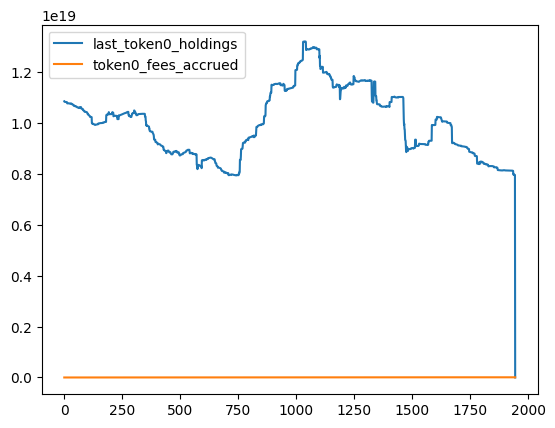

In [77]:
example_pos[['last_token0_holdings', 'token0_fees_accrued']].plot()

<Axes: >

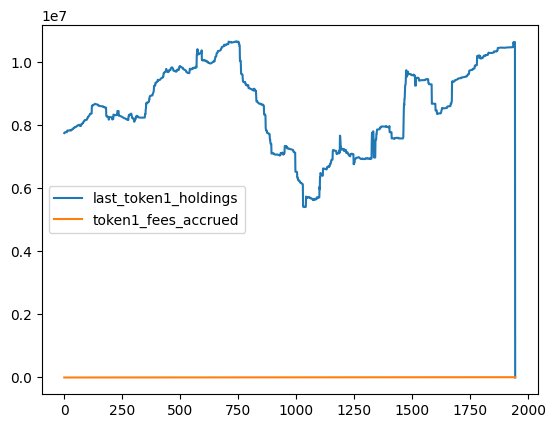

In [78]:
example_pos[['last_token1_holdings', 'token1_fees_accrued']].plot()

In [79]:
#Do they profit
#Collected - start or portfolio + fees - start, 
(example_pos['token0_collected'].iloc[-1] - example_pos['start_token0_holdings'].iloc[-1] - example_pos['increase_token0_holdings'].iloc[-1]), (example_pos['token1_collected'].iloc[-1] - example_pos['start_token1_holdings'].iloc[-1] - example_pos['increase_token1_holdings'].iloc[-1])

#the fees compensate for the portfolio returns because it was basically an option

(-2.8907214068226284e+18, 2888933.0)

Other features

In [80]:
clm.view_all_pool_events()

,event,logIndex,blockNumber,transactionIndex,transactionHash,sender,amount,tickLower,tickUpper,amount0,amount1,tokenId,recipient,sqrtPriceX96,tick,liquidity
0,Mint,102,12379502,64,0x72564d006c38b5316580c25a793b9da640c67e0128e3483dafe08b6dc6e76e21,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,4.891116e+15,-277000.0,-275490.0,2.000000e+20,1.623047e+08,3409.0,NaN,NaN,NaN,NaN
1,Mint,357,12379637,234,0xf7f0735e80c982c1948d6cde0d18fdd77b4d6fa2f028acdadda3094557d2e313,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,1.394819e+17,-276420.0,-276220.0,7.303603e+20,6.609029e+08,3512.0,NaN,NaN,NaN,NaN
2,Swap,319,12386801,148,0xe9b628a6c62fc7d5b14773a3c1b5bb255c49f66b2624100946a9e2134d05c4dc,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,NaN,NaN,-4.980745e+20,5.000000e+08,NaN,0x4E9408CcE75CE6D835bB0516A915C6C7B465B32a,7.949856e+22,-276256.0,1.443730e+17
3,Mint,167,12387286,30,0x4235765a916830e154f1191f33195411be376313d6a6dabad260d4d48dca23eb,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,8.000789e+19,-276330.0,-276320.0,0.000000e+00,4.000000e+10,8305.0,NaN,NaN,NaN,NaN
4,Swap,226,12393216,153,0xe2e813b93371fc4580e5468f72f83a6bcdecac0e856ed3fa808b5df412d7b5aa,0xE592427A0AEce92De3Edee1F18E0157C05861564,NaN,NaN,NaN,2.000000e+22,-1.999477e+10,NaN,0xC3D363e0EDB1Cbc5F1f839a48eEB199DC66e1300,7.922481e+22,-276325.0,8.015227e+19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69283,Collect,117,16993371,72,0xc15548a337e380c3a31ff33bab4ebb45c37063ffa0e83a7cd9403c93fca52dea,0x0709B103d46d71458a71e5d81230DD688809A53D,NaN,-276380.0,-276270.0,3.894892e+19,4.108736e+07,118704.0,NaN,NaN,NaN,NaN
69284,Swap,184,16994322,90,0xb16e3e5dc6c6a0a3598669bc2669b63db35fb814c0796d1c3d46ad98687bb08c,0xEf1c6E67703c7BD7107eed8303Fbe6EC2554BF6B,NaN,NaN,NaN,-4.504813e+21,4.505982e+09,NaN,0xE1573B9D29e2183B1AF0e743Dc2754979A40D237,7.921864e+22,-276327.0,1.704328e+22
69285,Swap,492,16995306,325,0x8e46f1a13f054d001ec3607aa3eb832a955a561026c8e1658d60f0f50ab61135,0xEf1c6E67703c7BD7107eed8303Fbe6EC2554BF6B,NaN,NaN,NaN,2.706278e+22,-2.704270e+10,NaN,0xA3Eabad0F86CD74fd170f1Eb55B81c6AF072dC01,7.921851e+22,-276327.0,1.704328e+22
69286,Collect,373,16997319,167,0x23d2c37fad946147c7c6bc974be49ae3401bc6fc4a30f81f88931f706ae57c82,0x9E0eE8CAD01A4DFc4167D077B0e5227E0090141b,NaN,-276380.0,-276270.0,4.872641e+17,3.168080e+05,93684.0,NaN,NaN,NaN,NaN


In [81]:
#view the swaps and other events by calling
clm.swaps

,event,logIndex,blockNumber,transactionIndex,transactionHash,sender,recipient,amount0,amount1,sqrtPriceX96,tick,liquidity
0,Swap,319,12386801,148,0xe9b628a6c62fc7d5b14773a3c1b5bb255c49f66b2624100946a9e2134d05c4dc,0xE592427A0AEce92De3Edee1F18E0157C05861564,0x4E9408CcE75CE6D835bB0516A915C6C7B465B32a,-4.980745e+20,5.000000e+08,7.949856e+22,-276256.0,1.443730e+17
0,Swap,226,12393216,153,0xe2e813b93371fc4580e5468f72f83a6bcdecac0e856ed3fa808b5df412d7b5aa,0xE592427A0AEce92De3Edee1F18E0157C05861564,0xC3D363e0EDB1Cbc5F1f839a48eEB199DC66e1300,2.000000e+22,-1.999477e+10,7.922481e+22,-276325.0,8.015227e+19
0,Swap,58,12393847,74,0x89af1e2c1756d486b162280c1ed4c6848eff52447070570f98b1123e2380f376,0xE592427A0AEce92De3Edee1F18E0157C05861564,0x564E67F219d0aA971f76DA43bd96043740244b51,6.084430e+21,-6.080412e+09,7.921880e+22,-276327.0,8.015227e+19
0,Swap,284,12416065,156,0x0fb80dbf380c69968e2880bc4bf35ae913147b571fa804ccfaff83640ee7f100,0xE592427A0AEce92De3Edee1F18E0157C05861564,0x82FC6a686C5dB9b41F58fea5A8cE4C1F6062E5A5,-1.586022e+22,1.586754e+10,7.923447e+22,-276323.0,8.018041e+19
0,Swap,113,12416621,88,0x0e5013cdd0a7a27f77e5dd539375e479d9d016e938db0fe7a47e3cab0eb1d09f,0xE592427A0AEce92De3Edee1F18E0157C05861564,0x36A87d1E3200225f881488E4AEedF25303FebcAe,1.000000e+18,-9.996590e+05,7.923447e+22,-276323.0,8.018041e+19
...,...,...,...,...,...,...,...,...,...,...,...,...
0,Swap,60,16992531,6,0xb1f888d457a26f99ed28d45e197a6762f10cf1e593fa9db05cb7b3aaa15726c1,0xE592427A0AEce92De3Edee1F18E0157C05861564,0xf761c0098967D756c9673F2798dbF23342badfF8,-8.330612e+21,8.332766e+09,7.921862e+22,-276327.0,1.704328e+22
0,Swap,282,16992991,151,0xb195fa635c9b890f5f5ee8e934a58fb347f9ce7efa44d5454bab81c07de998bd,0xEf1c6E67703c7BD7107eed8303Fbe6EC2554BF6B,0xEf1c6E67703c7BD7107eed8303Fbe6EC2554BF6B,1.876940e+19,-1.875549e+07,7.921862e+22,-276327.0,1.704328e+22
0,Swap,184,16994322,90,0xb16e3e5dc6c6a0a3598669bc2669b63db35fb814c0796d1c3d46ad98687bb08c,0xEf1c6E67703c7BD7107eed8303Fbe6EC2554BF6B,0xE1573B9D29e2183B1AF0e743Dc2754979A40D237,-4.504813e+21,4.505982e+09,7.921864e+22,-276327.0,1.704328e+22
0,Swap,492,16995306,325,0x8e46f1a13f054d001ec3607aa3eb832a955a561026c8e1658d60f0f50ab61135,0xEf1c6E67703c7BD7107eed8303Fbe6EC2554BF6B,0xA3Eabad0F86CD74fd170f1Eb55B81c6AF072dC01,2.706278e+22,-2.704270e+10,7.921851e+22,-276327.0,1.704328e+22


In [82]:
#pool name to be able to call for the save
clm.poolAddress, clm.token0, clm.token1 

('FRAX/USDC', 'FRAX', 'USDC')

In [84]:
#can also use the object to call the internal functions
clm.get_amounts(2, 1, 3, 1000)  #sqrtP, sqrtPA, sqrtPB, L returns amount0, amount1

(166.66666666666669, 1000)

In [83]:
#TBC 
clm.get_liquidity_distribution()
clm.quote_price()